In [29]:
import sys
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score

In [2]:
import sys
sys.path.append("../")
from algorithms.louvain import Louvain

# Data Preparation

In [3]:
def read_data(data_path="../data/emails.txt", labels_path="../data/emails_labels.txt"):
    with open(labels_path, "r") as f:
        nodes_labels = f.read()
    
    nodes_labels = nodes_labels.strip("\n").split("\n")
    nodes = [int(x.split()[0]) for x in nodes_labels]
    labels = [int(x.split()[1]) for x in nodes_labels]

    with open(data_path, "r") as f:
        edges_data = f.read()

    edges = {x: dict() for x in nodes}
    edges = [(int(x.split()[0]), int(x.split()[1])) for x in edges_data.strip("\n").split("\n")]

    return edges, nodes, labels



In [4]:
edges, nodes, labels = read_data()
edges[:10], nodes[:10], labels[:10]

([(0, 1),
  (2, 3),
  (2, 4),
  (5, 6),
  (5, 7),
  (8, 9),
  (10, 11),
  (12, 13),
  (12, 14),
  (15, 16)],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 1, 21, 21, 21, 25, 25, 14, 14, 14])

In [5]:
def get_n_m(x):
    n = int(x ** 0.5)
    while x % n != 0:
        n -= 1
    return tuple(sorted((n, x // n)))

In [6]:
def visualize(edges, nodes, labels, communities, x):
    np.random.seed = 30
    cmap = plt.cm.get_cmap('hsv', 42)
    node_labels = np.array(labels)
    norm = plt.Normalize(vmin=node_labels.min(), vmax=node_labels.max())
    color_map = cmap(norm(node_labels))

    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)

    pos = {}
    n = np.ceil(x ** 0.5)
    print(n)

    for node, community in enumerate(communities):
        x = (community % n) * 10  + np.random.random() * 7
        y = (community // n) * 10 + np.random.random() * 7
        pos[node] = [x, y]

    nx.draw(G, pos=pos, with_labels=False, node_size=3, width=0.01, node_color=color_map)
    plt.show();

C:\Users\MichaelKuzmyn\AppData\Local\Temp\ipykernel_3316\4113864001.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', 42)


7.0


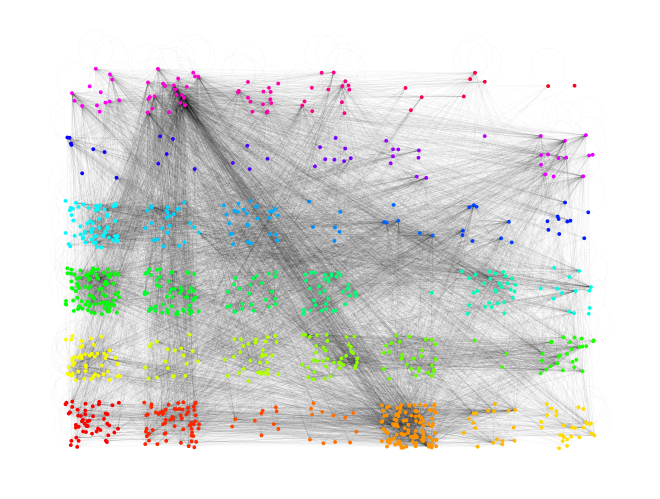

In [7]:
visualize(edges, nodes, labels, labels, 42)

In [8]:
def create_graph(edges, nodes):
    edge_dct = {x: [] for x in nodes}

    for u, v in edges:
        edge_dct[u].append(v)

    return edge_dct

In [9]:
edge_dct = create_graph(edges, nodes)
edge_dct[8]

[9,
 566,
 672,
 510,
 358,
 8,
 573,
 44,
 569,
 12,
 570,
 498,
 499,
 504,
 441,
 7,
 525,
 11,
 141,
 856,
 86,
 466,
 823,
 661,
 160,
 950,
 213,
 301]

In [10]:
l = Louvain(edge_dct)

communities = l.louvain()

In [11]:
len(communities[0]), communities[0]

(54,
 {4: [712, 995],
  11: [0,
   513,
   514,
   1,
   518,
   519,
   521,
   10,
   524,
   17,
   16,
   531,
   20,
   21,
   22,
   18,
   536,
   535,
   538,
   539,
   540,
   541,
   546,
   548,
   549,
   550,
   551,
   553,
   554,
   42,
   559,
   560,
   561,
   62,
   578,
   66,
   577,
   69,
   582,
   67,
   72,
   68,
   74,
   73,
   583,
   589,
   77,
   591,
   80,
   81,
   82,
   83,
   594,
   85,
   86,
   87,
   596,
   597,
   90,
   91,
   92,
   598,
   606,
   607,
   612,
   615,
   105,
   106,
   107,
   620,
   108,
   109,
   110,
   111,
   112,
   626,
   627,
   117,
   118,
   120,
   121,
   127,
   638,
   641,
   642,
   134,
   647,
   650,
   651,
   652,
   142,
   143,
   144,
   145,
   146,
   147,
   663,
   152,
   153,
   154,
   155,
   667,
   669,
   671,
   163,
   166,
   678,
   679,
   173,
   690,
   693,
   183,
   184,
   695,
   696,
   187,
   188,
   189,
   190,
   701,
   186,
   702,
   710,
   713,
   715,
   72

In [12]:
def create_graph_from_communities(communities):
    nodes = [x for x in range(1005)]
    labels = [None] * 1005

    for c in communities:
        for u in communities[c]:
            labels[u] = c

    return nodes, labels

In [13]:
nodes_loivain, labels_louvain = create_graph_from_communities(communities[0])
nodes_loivain[:10], labels_louvain[:10]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [11, 11, 424, 424, 424, 424, 424, 406, 406, 406])

In [26]:
nmi_score_louvain = normalized_mutual_info_score(labels_louvain, labels)
f"{nmi_score_louvain=}"

'nmi_score_louvain=0.530286478276967'

C:\Users\MichaelKuzmyn\AppData\Local\Temp\ipykernel_3316\4113864001.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', 42)


8.0


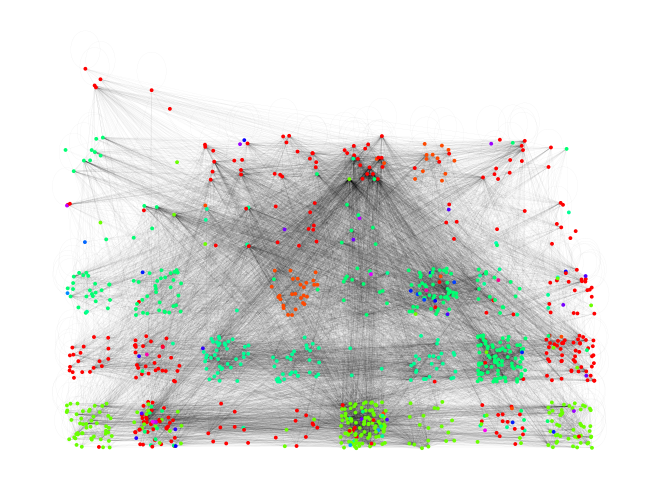

In [15]:
visualize(edges, nodes_loivain, labels_louvain, labels, len(communities[0]))

In [27]:
def built_in_louvain(edges, nodes, labels):
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    comms = nx.community.louvain_communities(G)

    x = len(comms)
    communities = [None] * 1005
    for idx, c in enumerate(comms):
        for n in c:
            communities[n] = idx

    nmi_score_louvain = normalized_mutual_info_score(communities, labels)
    print(f"{nmi_score_louvain=}")

    np.random.seed = 30
    cmap = plt.cm.get_cmap('hsv', 42)
    node_labels = np.array(labels)
    norm = plt.Normalize(vmin=node_labels.min(), vmax=node_labels.max())
    color_map = cmap(norm(node_labels))

    pos = {}
    n = np.ceil(x ** 0.5)

    for node, community in enumerate(communities):
        x = (community % n) * 10  + np.random.random() * 7
        y = (community // n) * 10 + np.random.random() * 7
        pos[node] = [x, y]

    nx.draw(G, pos=pos, with_labels=False, node_size=3, width=0.01, node_color=color_map)
    plt.show();

nmi_score_louvain=0.5692021312777605


C:\Users\MichaelKuzmyn\AppData\Local\Temp\ipykernel_3316\115158175.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', 42)


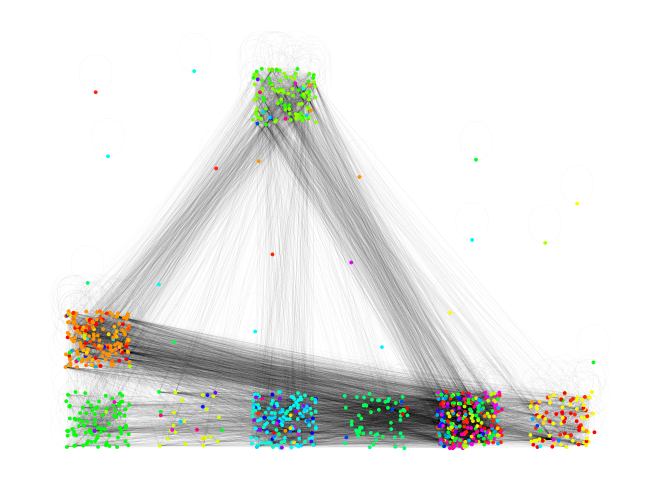

In [28]:
built_in_louvain(edges, nodes, labels)